In [2]:
# Load necessary library
import pandas as pd

# Replace 'your-data-file.csv' with the path to your CSV file
file_path = 'unknown.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display first 5 rows to check data
df.head()


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.833071e+14,1.343786e+09,314242.1875,538727.93750,13.1,62.700001,2.230797,157.382812,-1.0,crowd_sourced
1,1.833071e+14,1.343786e+09,314242.1875,538727.93750,13.8,65.199997,2.232352,157.386047,-1.0,crowd_sourced
2,1.833071e+14,1.343792e+09,343947.9375,513526.09375,13.0,61.700001,2.410787,157.745605,-1.0,crowd_sourced
3,1.833071e+14,1.343799e+09,369211.7500,491134.56250,13.4,63.799999,2.591992,158.094574,-1.0,crowd_sourced
4,1.833071e+14,1.343805e+09,362496.2500,472878.43750,12.6,66.000000,2.759518,158.458908,-1.0,crowd_sourced


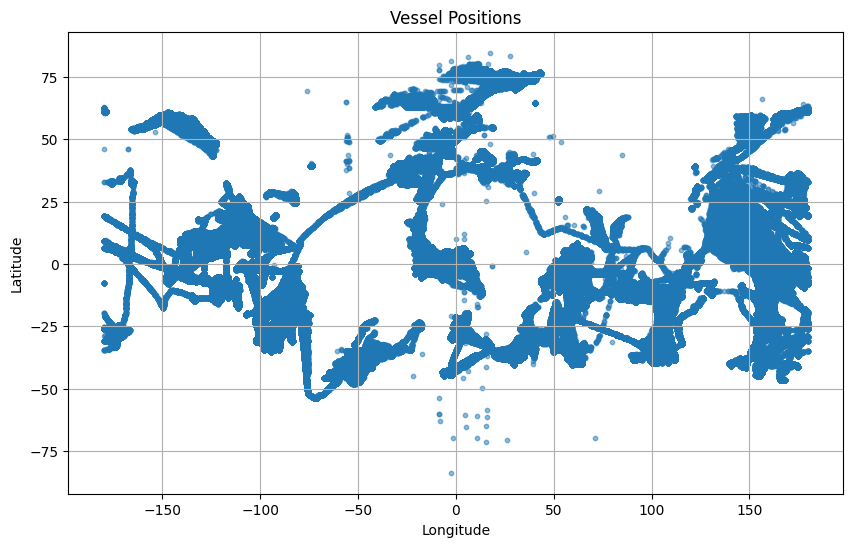

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], s=10, alpha=0.5)
plt.title('Vessel Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [4]:
# Average speed of vessels
avg_speed = df['speed'].mean()
print(f"Average vessel speed: {avg_speed:.2f} knots")

# Count unique vessels
unique_vessels = df['mmsi'].nunique()
print(f"Number of unique vessels: {unique_vessels}")

# Count fishing activity labels
fishing_counts = df['is_fishing'].value_counts()
print("Fishing activity distribution:")
print(fishing_counts)


Average vessel speed: 3.79 knots
Number of unique vessels: 120
Fishing activity distribution:
is_fishing
-1.000000    6731634
 0.000000      45957
 1.000000      30201
 0.333333       1799
 0.666667       1280
 0.750000        547
 0.250000        130
 0.800000          4
Name: count, dtype: int64


/Users/parvjain/Documents/illegal-fishing-detector/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


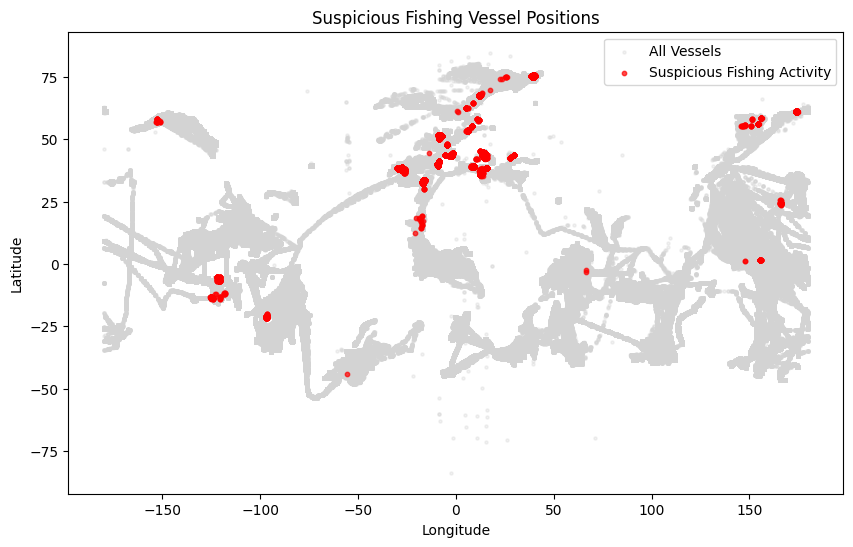

In [5]:
import matplotlib.pyplot as plt

# Filter vessels moving slower than 2 knots AND with fishing activity flagged as 1 (fishing)
suspicious_vessels = df[(df['speed'] < 2) & (df['is_fishing'] == 1)]

plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], color='lightgrey', s=5, alpha=0.3, label='All Vessels')
plt.scatter(suspicious_vessels['lon'], suspicious_vessels['lat'], color='red', s=10, alpha=0.7, label='Suspicious Fishing Activity')
plt.title('Suspicious Fishing Vessel Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
